In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import itertools
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Loading features dataset

In [2]:
features = pd.read_csv(r'D:\OneDrive - Students RWTH Aachen University\PADS thesis topic\SAPDataset\ML Features files\final_features_03092023_2222.csv')

In [3]:
features

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,table_name,col_name,datatype
0,0.005887,0.99198,0.994113,0.094149,0.166667,0.237378,0.437666,EBAN,MANDT,CLNT
1,0.002309,0.99000,0.997691,0.086561,0.000000,0.203235,0.434629,EBAN,MANDT,CLNT
2,0.001734,0.99000,0.998266,0.100380,0.000000,0.202429,0.440154,EBAN,MANDT,CLNT
3,0.002312,0.99000,0.997688,0.102161,0.000000,0.203239,0.440869,EBAN,MANDT,CLNT
4,0.002312,0.99000,0.997688,0.090962,0.000000,0.203239,0.436389,EBAN,MANDT,CLNT
...,...,...,...,...,...,...,...,...,...,...
8303,0.001000,0.66000,0.999000,0.001000,0.000000,0.201400,10.200401,BKPF,CURT2,CHAR
8304,0.002500,0.66099,0.997500,0.015732,0.000000,0.201400,10.206294,BKPF,CURT2,CHAR
8305,0.002000,0.66066,0.998000,0.019811,0.000000,0.201400,10.207925,BKPF,CURT2,CHAR
8306,0.001500,0.66033,0.998500,0.011407,0.000000,0.201400,10.204564,BKPF,CURT2,CHAR


In [5]:
# Assuming 'df' is your DataFrame
columns_to_check = ['Completeness', 'Precision', 'Integrity', 'Objectivity', 'Conciseness', 'Uniqueness', 'Informativeness']

# Calculate and print the minimum and maximum values for each column
for col in columns_to_check:
    min_value = features[col].min()
    mean_value = features[col].mean()
    max_value = features[col].max()
    print(f"Column: {col}")
    print(f"Minimum Value: {min_value}")
    print(f"Maximum Value: {max_value}")
    print(f"mean Value: {mean_value}")
    print()

Column: Completeness
Minimum Value: 0.0005
Maximum Value: 0.7836253791708796
mean Value: 0.30186373160163615

Column: Precision
Minimum Value: 0.33
Maximum Value: 13.53
mean Value: 2.665756444390913

Column: Integrity
Minimum Value: 0.2163746208291203
Maximum Value: 0.9995
mean Value: 0.6981362683983963

Column: Objectivity
Minimum Value: 0.0005
Maximum Value: 5.482892142331009
mean Value: 1.0724244098625737

Column: Conciseness
Minimum Value: 0.0
Maximum Value: 0.3333333333333333
mean Value: 0.013635870796138021

Column: Uniqueness
Minimum Value: 0.2007001001001001
Maximum Value: 1000.76
mean Value: 18.439472375533583

Column: Informativeness
Minimum Value: 0.4002002002002002
Maximum Value: 2003.9931568569325
mean Value: 41.58666073602284



In [4]:
final_features_GMM = features.copy()

# Encoding datatype

In [5]:
encoder = LabelEncoder()

In [21]:
# geting an exhaustive set of datatypes from dd03l for datatype encoding to numbers
# dd03l = pd.read_csv('D:\OneDrive - Students RWTH Aachen University\PADS thesis topic\SAPDataset\DD03L.csv'  , encoding= 'unicode_escape', low_memory= False )

In [23]:
# encoder.fit(dd03l['DATATYPE'])
# print("Mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

Mapping: {' ': 0, 'ACCP': 1, 'CHAR': 2, 'CLNT': 3, 'CUKY': 4, 'CURR': 5, 'D16D': 6, 'D16R': 7, 'D16S': 8, 'D34D': 9, 'D34R': 10, 'D34S': 11, 'DATS': 12, 'DEC': 13, 'FLTP': 14, 'INT1': 15, 'INT2': 16, 'INT4': 17, 'INT8': 18, 'LANG': 19, 'LCHR': 20, 'LRAW': 21, 'NUMC': 22, 'PREC': 23, 'QUAN': 24, 'RAW': 25, 'REF': 26, 'RSTR': 27, 'SSTR': 28, 'STRG': 29, 'STRU': 30, 'TIMS': 31, 'TTYP': 32, 'UNIT': 33}


In [25]:
# Save the mapping to a pkl file
# with open('datatype_encoding_mapping.pkl', 'wb') as f:
#     pickle.dump(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))), f)

In [6]:
# load the pkl file 
with open('..\datatype_encoding_mapping.pkl', 'rb') as f:
    datatype_encoding_mapping = pickle.load(f)

In [7]:
# encode the datatype in train data with mapping from pkl
features['EncodedDatatype'] = features['datatype'].map(datatype_encoding_mapping)
features = features.drop(['datatype'] , axis =1)

In [8]:
features

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,table_name,col_name,EncodedDatatype
0,0.005887,0.99198,0.994113,0.094149,0.166667,0.237378,0.437666,EBAN,MANDT,3
1,0.002309,0.99000,0.997691,0.086561,0.000000,0.203235,0.434629,EBAN,MANDT,3
2,0.001734,0.99000,0.998266,0.100380,0.000000,0.202429,0.440154,EBAN,MANDT,3
3,0.002312,0.99000,0.997688,0.102161,0.000000,0.203239,0.440869,EBAN,MANDT,3
4,0.002312,0.99000,0.997688,0.090962,0.000000,0.203239,0.436389,EBAN,MANDT,3
...,...,...,...,...,...,...,...,...,...,...
8303,0.001000,0.66000,0.999000,0.001000,0.000000,0.201400,10.200401,BKPF,CURT2,2
8304,0.002500,0.66099,0.997500,0.015732,0.000000,0.201400,10.206294,BKPF,CURT2,2
8305,0.002000,0.66066,0.998000,0.019811,0.000000,0.201400,10.207925,BKPF,CURT2,2
8306,0.001500,0.66033,0.998500,0.011407,0.000000,0.201400,10.204564,BKPF,CURT2,2


# Loading labels

In [9]:
labels_data = pd.read_csv('..\ML_Col_Labels_Combined_05092023.csv')

In [10]:
labels_data

,Category Number,Column Name,Category,Explanation,Table Name
0,0,MANDT,CASEID,Client (Identifying information for the case o...,BKPF
1,0,BUKRS,Activity,Company Code (Potentially an activity),BKPF
2,0,BELNR,CASEID,Accounting Document Number (Identifying inform...,BKPF
3,0,GJAHR,Timestamp,Fiscal Year (Timestamp or date information),BKPF
4,2,BLART,Activity,Document Type (Potentially an activity),BKPF
...,...,...,...,...,...
337,3,NETWR,Activity,Net Amount (Potentially an activity),VBRK
338,3,ZUKRI,Activity,Indicator: Bill of Exchange Bill Received (Pot...,VBRK
339,3,ERNAM,Activity,Name of Person Who Created the Object (Potenti...,VBRK
340,1,ERZET,Activity,Entry Time (Potentially an activity),VBRK


In [11]:
np.unique(labels_data['Category Number'], return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([ 25,  32, 149, 136], dtype=int64))

In [7]:
np.unique(labels_data['Table Name'])

array(['BKPF', 'EKKO', 'Eban', 'LIKP', 'MKPF', 'RBKP', 'VBAK', 'VBRK'],
      dtype=object)

In [19]:
labels_data['Category Number'].value_counts(normalize=True)*100

2    43.567251
3    39.766082
1     9.356725
0     7.309942
Name: Category Number, dtype: float64

In [11]:
labelled_features = features.merge(labels_data , left_on=['table_name',	'col_name'] , right_on=['Table Name','Column Name'],suffixes=('_l', '_r'))
labelled_features = labelled_features.drop(['Explanation' , 'Category','Table Name','Column Name'],axis=1)

In [12]:
labelled_features

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,table_name,col_name,EncodedDatatype,Category Number
0,0.001561,0.99000,0.998439,0.026696,0.166667,0.235520,0.410680,EKKO,MANDT,3,0
1,0.002081,0.99000,0.997919,0.022515,0.166667,0.236249,0.409009,EKKO,MANDT,3,0
2,0.001561,0.99000,0.998439,0.044115,0.166667,0.235520,0.417648,EKKO,MANDT,3,0
3,0.001561,0.99000,0.998439,0.050704,0.166667,0.235520,0.420284,EKKO,MANDT,3,0
4,0.001561,0.99000,0.998439,0.043065,0.166667,0.235520,0.417228,EKKO,MANDT,3,0
...,...,...,...,...,...,...,...,...,...,...,...
7969,0.001000,0.66000,0.999000,0.001000,0.000000,0.201400,10.200401,BKPF,CURT2,2,3
7970,0.002500,0.66099,0.997500,0.015732,0.000000,0.201400,10.206294,BKPF,CURT2,2,3
7971,0.002000,0.66066,0.998000,0.019811,0.000000,0.201400,10.207925,BKPF,CURT2,2,3
7972,0.001500,0.66033,0.998500,0.011407,0.000000,0.201400,10.204564,BKPF,CURT2,2,3


In [31]:
for group_name, group_data in labelled_features.groupby(['table_name', 'col_name']):
    print(f"\n Group: {group_name}")
    print(group_data.head())


 Group: ('BKPF', 'AEDAT')
      Completeness  Precision  Integrity  Objectivity  Conciseness  \
6774         0.501    3.29967      0.499     0.012907       0.0625   
6775         0.501    3.30000      0.499     0.006704       0.0625   
6776         0.500    3.29934      0.500     0.012407       0.0625   
6777         0.501    3.29967      0.499     0.018609       0.0000   
6778         0.500    3.29934      0.500     0.006704       0.0625   

      Uniqueness  Informativeness table_name col_name  EncodedDatatype  \
6774    0.214601         2.605165       BKPF    AEDAT               12   
6775    0.213900         2.602682       BKPF    AEDAT               12   
6776    0.213900         2.604964       BKPF    AEDAT               12   
6777    0.202101         2.607446       BKPF    AEDAT               12   
6778    0.213900         2.602682       BKPF    AEDAT               12   

      Category Number  
6774                2  
6775                2  
6776                2  
6777       

In [14]:
len(labelled_features.groupby(['table_name', 'col_name']))

290

In [12]:
labelled_features['Category Number'].value_counts(normalize=True)*100

2    42.199649
3    39.403060
1    10.321043
0     8.076248
Name: Category Number, dtype: float64

# PCA

In [51]:
scaler = StandardScaler()
copy_for_scaling = labelled_features.copy()
scaled_data = scaler.fit_transform(copy_for_scaling.drop(['EncodedDatatype','table_name','col_name'	,'Category Number'],axis=1))

In [53]:
scaled_df = pd.DataFrame(scaled_data, columns=copy_for_scaling.drop(['EncodedDatatype','table_name','col_name','Category Number'],axis=1).columns )

In [54]:
# Step 2: Perform PCA
n_components = len(scaled_df.columns)  # Number of features
pca = PCA(n_components=n_components)
pca.fit(scaled_df)

# Step 3: Retrieve explained variances
explained_variances = pca.explained_variance_ratio_

# Step 4: Sort features by importance in descending order
feature_importance = list(enumerate(explained_variances))
feature_importance.sort(key=lambda x: x[1], reverse=True)


In [55]:
# Now, 'feature_importance' contains the indices and importance values of features
# in descending order of importance.
for idx, importance in feature_importance:
    print(f"Feature {idx}: Importance = {importance:.4f}")

Feature 0: Importance = 0.3477
Feature 1: Importance = 0.2946
Feature 2: Importance = 0.1406
Feature 3: Importance = 0.1204
Feature 4: Importance = 0.0966
Feature 5: Importance = 0.0000
Feature 6: Importance = 0.0000


# Train val test split

In [15]:
X_train, X_val_test, y_train, y_val_test = train_test_split(labelled_features.drop(['Category Number'],axis=1),
                                                            labelled_features['Category Number'], 
                                                            test_size=0.3, random_state=42)

In [28]:
X_train

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,table_name,col_name,EncodedDatatype
2820,0.500506,5.61000,0.499494,0.006210,0.0,0.200709,3.602484,MKPF,FRBNR,2
7853,0.003000,0.33132,0.997000,0.006704,0.0,0.201400,9.402682,BKPF,UMRD3,2
6899,0.024000,6.60066,0.976000,1.473042,0.0,0.232422,3.789661,BKPF,TCODE,2
589,0.500792,3.62571,0.499208,0.340517,0.0,0.210230,8.336250,EKKO,LLIEF,2
5312,0.373660,2.22255,0.626340,0.761905,0.0,0.208640,4.104793,VBRK,BZIRK,2
...,...,...,...,...,...,...,...,...,...,...
5226,0.475553,0.97251,0.524447,0.524970,0.0,0.202876,3.609991,VBRK,KONDA,2
5390,0.155107,1.08966,0.844893,0.755088,0.0,0.205756,4.502049,VBRK,INCO1,2
860,0.260671,2.97000,0.739329,4.618274,0.0,0.621722,3.360876,LIKP,ERDAT,12
7603,0.004000,1.65000,0.996000,0.490497,0.0,0.205606,7.996212,BKPF,HWAER,4


In [17]:
len(X_train.groupby(['table_name', 'col_name']))

290

## Split the val data into val and test

In [24]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test, 
                                                test_size=0.33, random_state=42)

In [22]:
print(len(labelled_features))
print(len(X_train))
print(len(X_val))
print(len(X_test))

7974
5581
1603
790


In [30]:
for group_name, group_data in X_test.groupby(['table_name', 'col_name']):
    print(f"\n Group: {group_name}")
    print(group_data.head())


 Group: ('BKPF', 'AEDAT')
      Completeness  Precision  Integrity  Objectivity  Conciseness  \
6778        0.5000    3.29934     0.5000     0.006704       0.0625   
6802        0.4995    3.29835     0.5005     0.012407       0.0000   
6795        0.5000    3.29934     0.5000     0.006704       0.0000   
6779        0.5010    3.29967     0.4990     0.018609       0.0625   
6783        0.5015    3.29967     0.4985     0.002000       0.0000   

      Uniqueness  Informativeness table_name col_name  EncodedDatatype  
6778    0.213900         2.602682       BKPF    AEDAT               12  
6802    0.202802         2.604966       BKPF    AEDAT               12  
6795    0.201400         2.602682       BKPF    AEDAT               12  
6779    0.214601         2.607446       BKPF    AEDAT               12  
6783    0.202802         2.600803       BKPF    AEDAT               12  

 Group: ('BKPF', 'ARCID')
      Completeness  Precision  Integrity  Objectivity  Conciseness  \
7448        0.500

In [25]:
len(X_test.groupby(['table_name', 'col_name']))

251

# Exploring the train and validation data

In [85]:
print('Total datapoints in training set',len(y_train))
print('Datapoints per category in training set',np.unique(y_train, return_counts= True))

Total datapoints in training set 5581
Datapoints per category in training set (array([0, 1, 2, 3], dtype=int64), array([ 426,  566, 2369, 2220], dtype=int64))


In [86]:
print('Total datapoints in testing set',len(y_test))
print('Datapoints per category in testing set',np.unique(y_test, return_counts= True))

Total datapoints in training set 790
Datapoints per category in training set (array([0, 1, 2, 3], dtype=int64), array([ 77,  94, 321, 298], dtype=int64))


In [43]:
X_train_lab = X_train.copy()
X_train_lab['labels'] = y_train
for i in np.unique(y_train):
    print('Individual SAP cols in category',i)
    print(len(X_train_lab.loc[X_train_lab['labels'] == i].groupby(['table_name', 'col_name'])))

Individual SAP cols in category 0
22
Individual SAP cols in category 1
31
Individual SAP cols in category 2
123
Individual SAP cols in category 3
114


In [44]:
X_test_lab = X_test.copy()
X_test_lab['labels'] = y_test
for i in np.unique(y_test):
    print('Individual SAP cols in category',i)
    print(len(X_test_lab.loc[X_test_lab['labels'] == i].groupby(['table_name', 'col_name'])))

Individual SAP cols in category 0
21
Individual SAP cols in category 1
27
Individual SAP cols in category 2
108
Individual SAP cols in category 3
95


# GMM

In [17]:
# Create a GMM model with the chosen number of components
gmm = GaussianMixture(n_components=4, n_init = 100)

# Fit the model to your data
gmm.fit(X_train.drop(['table_name',	'col_name'],axis=1))

GaussianMixture(n_components=4, n_init=100)

In [18]:
cluster_assignments = gmm.predict(X_val.drop(['table_name',	'col_name'],axis=1)) #predict clusters for the columns
X_val['Cluster'] = cluster_assignments #save clusters assigned to columns

In [19]:
# Define a mapping dictionary
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Use the map function to replace values in the 'clusters' column
X_val['Cluster'] = X_val['Cluster'].map(mapping)

X_val

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,table_name,col_name,EncodedDatatype,Cluster
96,0.501042,0.66000,0.498958,0.006746,0.0,0.201459,1.802699,EKKO,LOEKZ,2,A
3395,0.513145,2.64000,0.486855,0.144150,0.0,0.218473,5.457802,MKPF,SPE_BUDAT_UHR,31,D
4753,0.005647,1.32000,0.994353,0.559484,0.0,0.207918,1.023820,VBRK,FKART,2,A
6180,0.500513,0.66000,0.499487,0.000513,0.0,0.200719,8.600206,VBRK,TAXK6,2,A
2728,0.500506,4.62000,0.499494,0.000506,0.0,0.200708,3.400202,MKPF,FRATH,5,D
...,...,...,...,...,...,...,...,...,...,...,...
2858,0.077517,0.38016,0.922483,0.679852,0.0,0.202124,4.071943,MKPF,WEVER,2,A
5341,0.465580,0.96525,0.534420,0.532566,0.0,0.204316,4.213034,VBRK,PLTYP,2,A
3443,0.433539,2.26380,0.566461,0.116300,0.0,0.204960,5.446530,MKPF,SPE_BUDAT_ZONE,2,A
6210,0.500513,0.66000,0.499487,0.000513,0.0,0.200719,8.800206,VBRK,TAXK7,2,A


# Scatter plots of clusters

In [31]:
cluster_assignments_copy = cluster_assignments.copy()
# Define a mapping dictionary
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Use NumPy's vectorized operations to replace values in the 'cluster_assignments_copy' array
cluster_assignments_copy = np.vectorize(mapping.get)(cluster_assignments_copy)

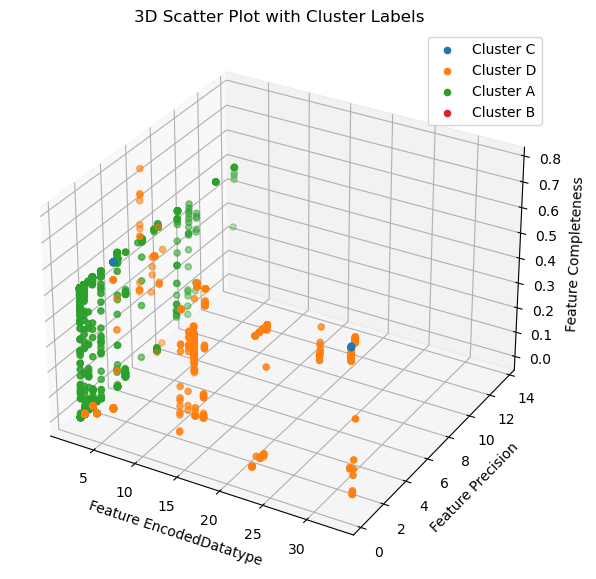

In [32]:
# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

feature_z_ = 'Completeness'
feature_y_ = 'Precision'
feature_x_ = 'EncodedDatatype'  # Replace with the index of the feature you want on the z-axis

# Create a list of unique cluster labels
unique_clusters = list(set(cluster_assignments_copy))

# Create a colormap with as many colors as there are clusters
colormap = plt.cm.viridis

# Iterate through clusters and create scatter plots with labels
for cluster in unique_clusters:
    cluster_indices = cluster_assignments_copy == cluster
    ax.scatter(X_val[feature_x_][cluster_indices], X_val[feature_y_][cluster_indices],
               X_val[feature_z_][cluster_indices], label=f'Cluster {cluster}', cmap=colormap)

# Labeling the axes
ax.set_xlabel(f'Feature {feature_x_}')
ax.set_ylabel(f'Feature {feature_y_}')
ax.set_zlabel(f'Feature {feature_z_}')

# Create a legend with colors and cluster labels
ax.legend()

plt.title("3D Scatter Plot with Cluster Labels")
plt.show()

# Cluster labelling

In [36]:
# Generate all permutations of category assignments to clusters
permutations = list(itertools.permutations([0, 1, 2, 3]))
clusters = ['A', 'B', 'C', 'D']
results_df = pd.DataFrame(columns=clusters + ['Accuracy'])

In [34]:
# Iterate through permutations and calculate BCE
for perm in permutations:
    df = X_val.copy()
    assignment_mapping = dict(zip(clusters, perm))  # Map clusters to categories
    print(assignment_mapping)
    df['Cluster'] = df['Cluster'].map(assignment_mapping)
    accuracy = accuracy_score(y_val, df['Cluster'])

    # Append results to the DataFrame
    result_row = list(perm) + [accuracy]
    results_df = results_df.append(pd.Series(result_row, index=results_df.columns), ignore_index=True)


{'A': 0, 'B': 1, 'C': 2, 'D': 3}
{'A': 0, 'B': 1, 'C': 3, 'D': 2}
{'A': 0, 'B': 2, 'C': 1, 'D': 3}
{'A': 0, 'B': 2, 'C': 3, 'D': 1}
{'A': 0, 'B': 3, 'C': 1, 'D': 2}
{'A': 0, 'B': 3, 'C': 2, 'D': 1}
{'A': 1, 'B': 0, 'C': 2, 'D': 3}
{'A': 1, 'B': 0, 'C': 3, 'D': 2}
{'A': 1, 'B': 2, 'C': 0, 'D': 3}
{'A': 1, 'B': 2, 'C': 3, 'D': 0}
{'A': 1, 'B': 3, 'C': 0, 'D': 2}
{'A': 1, 'B': 3, 'C': 2, 'D': 0}
{'A': 2, 'B': 0, 'C': 1, 'D': 3}
{'A': 2, 'B': 0, 'C': 3, 'D': 1}
{'A': 2, 'B': 1, 'C': 0, 'D': 3}
{'A': 2, 'B': 1, 'C': 3, 'D': 0}
{'A': 2, 'B': 3, 'C': 0, 'D': 1}
{'A': 2, 'B': 3, 'C': 1, 'D': 0}
{'A': 3, 'B': 0, 'C': 1, 'D': 2}
{'A': 3, 'B': 0, 'C': 2, 'D': 1}
{'A': 3, 'B': 1, 'C': 0, 'D': 2}
{'A': 3, 'B': 1, 'C': 2, 'D': 0}
{'A': 3, 'B': 2, 'C': 0, 'D': 1}
{'A': 3, 'B': 2, 'C': 1, 'D': 0}


C:\Users\Kapil Deshmukh\AppData\Local\Temp\ipykernel_21960\831241195.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(result_row, index=results_df.columns), ignore_index=True)
C:\Users\Kapil Deshmukh\AppData\Local\Temp\ipykernel_21960\831241195.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(result_row, index=results_df.columns), ignore_index=True)
C:\Users\Kapil Deshmukh\AppData\Local\Temp\ipykernel_21960\831241195.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(pd.Series(result_row, index=results_df.columns), ignore_index=True)
C:\Users\Kapil Deshmukh\AppData\Local\Temp\ipykernel_21960\831241195.p

## Final cluster labelling

In [35]:
# this means that the columns which are classified in cluster D will be used to make activities.
results_df.loc[results_df['Accuracy'] == max(results_df['Accuracy'])]

,A,B,C,D,Accuracy
18,3.0,0.0,1.0,2.0,0.452901


In [56]:
results_df

,A,B,C,D,Accuracy
0,0.0,1.0,2.0,3.0,0.097941
1,0.0,1.0,3.0,2.0,0.143481
2,0.0,2.0,1.0,3.0,0.102932
3,0.0,2.0,3.0,1.0,0.106051
4,0.0,3.0,1.0,2.0,0.155334
5,0.0,3.0,2.0,1.0,0.112913
6,1.0,0.0,2.0,3.0,0.108546
7,1.0,0.0,3.0,2.0,0.154086
8,1.0,2.0,0.0,3.0,0.094822
9,1.0,2.0,3.0,0.0,0.052402


# Testing with test dataset

In [20]:
cluster_assignments_test = gmm.predict(X_test.drop(['table_name',	'col_name'],axis=1)) #predict clusters for the columns
X_test['Cluster'] = cluster_assignments_test #save clusters assigned to columns

In [21]:
# Define a mapping dictionary
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Use the map function to replace values in the 'clusters' column
X_test['Cluster'] = X_test['Cluster'].map(mapping)

X_test

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,table_name,col_name,EncodedDatatype,Cluster
1061,0.295565,1.18239,0.704435,1.262465,0.0000,0.205698,4.304999,LIKP,INCO1,2,A
4726,0.500000,3.30000,0.500000,5.482892,0.1875,1000.737500,2002.393157,VBRK,VBELN,2,B
6562,0.495000,3.30000,0.505000,5.467892,0.1500,10.724000,22.589157,BKPF,BELNR,2,A
2487,0.503539,1.65000,0.496461,0.212671,0.0000,0.204960,2.885079,MKPF,TCODE,2,A
3428,0.501517,2.31000,0.498483,0.108595,0.0000,0.202124,5.443440,MKPF,SPE_BUDAT_ZONE,2,A
...,...,...,...,...,...,...,...,...,...,...,...
2758,0.501011,5.61000,0.498989,0.001011,0.0000,0.201416,3.600405,MKPF,FRBNR,2,A
1746,0.013650,1.32000,0.986350,1.769872,0.0000,0.219187,1.508102,MKPF,MJAHR,22,D
6634,0.245000,2.97000,0.755000,4.357562,0.0000,0.590078,3.437182,BKPF,BLDAT,12,D
2894,0.003018,0.33099,0.996982,0.717891,0.0000,0.202126,4.087158,MKPF,WEVER,2,A


In [22]:
df = X_test.copy()
# Define the true labels (categories) and predicted labels (clusters)
true_labels = y_test
df['Cluster']= df['Cluster'].map({'A': 3, 'B': 0, 'C': 1, 'D': 2})
predicted_labels = df['Cluster']
# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

## Confusion Matrix

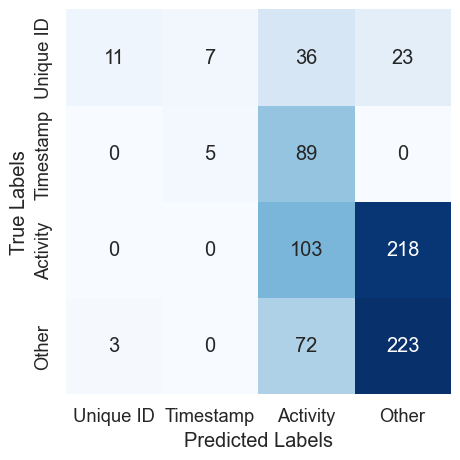

In [23]:
# Define class labels
class_labels = ['Unique ID', 'Timestamp', 'Activity', 'Other']

# Create a seaborn heatmap for the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.title('Confusion Matrix of the prediction classes based on unsupervised learning method')

# Display the plot
plt.show()

## Classification Report

In [24]:
# Calculate precision, recall, F1-score, and support
class_labels = ['Unique ID', 'Timestamp', 'Activity', 'Other']
report = classification_report(true_labels, predicted_labels,target_names=class_labels)

# Print the metrics
print(report)

              precision    recall  f1-score   support

   Unique ID       0.79      0.14      0.24        77
   Timestamp       0.42      0.05      0.09        94
    Activity       0.34      0.32      0.33       321
       Other       0.48      0.75      0.59       298

    accuracy                           0.43       790
   macro avg       0.51      0.32      0.31       790
weighted avg       0.45      0.43      0.39       790



# grouping results

In [32]:
X_test['true labels'] = y_test
X_test

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,table_name,col_name,EncodedDatatype,true labels
1061,0.295565,1.18239,0.704435,1.262465,0.0000,0.205698,4.304999,LIKP,INCO1,2,3
4726,0.500000,3.30000,0.500000,5.482892,0.1875,1000.737500,2002.393157,VBRK,VBELN,2,0
6562,0.495000,3.30000,0.505000,5.467892,0.1500,10.724000,22.589157,BKPF,BELNR,2,0
2487,0.503539,1.65000,0.496461,0.212671,0.0000,0.204960,2.885079,MKPF,TCODE,2,2
3428,0.501517,2.31000,0.498483,0.108595,0.0000,0.202124,5.443440,MKPF,SPE_BUDAT_ZONE,2,2
...,...,...,...,...,...,...,...,...,...,...,...
2758,0.501011,5.61000,0.498989,0.001011,0.0000,0.201416,3.600405,MKPF,FRBNR,2,2
1746,0.013650,1.32000,0.986350,1.769872,0.0000,0.219187,1.508102,MKPF,MJAHR,22,0
6634,0.245000,2.97000,0.755000,4.357562,0.0000,0.590078,3.437182,BKPF,BLDAT,12,1
2894,0.003018,0.33099,0.996982,0.717891,0.0000,0.202126,4.087158,MKPF,WEVER,2,2


In [33]:
# group the data by maximum assignment to improve reliability of result
# Since data has multiple instnances of same column from SAP table, we predict the clusters for all instances
# next we assign the cluster to that column which has been predicted for it the maximum number of times.
# This improves the reliability of the predictions.  
result_df = X_test.groupby([ 'col_name'])['Cluster'].apply(lambda x: x.value_counts().idxmax()).reset_index()
result_df.rename(columns={'cluster': 'most_common_cluster'}, inplace=True)

KeyError: 'Column not found: Cluster'

In [90]:
test_labels = X_test[['table_name','col_name','true labels']]

In [98]:
result_df

,table_name,col_name,Cluster
0,BKPF,AEDAT,D
1,BKPF,ARCID,A
2,BKPF,AWKEY,A
3,BKPF,AWTYP,A
4,BKPF,BASW2,A
...,...,...,...
246,VBRK,VTWEG,A
247,VBRK,WAERK,D
248,VBRK,ZLSCH,A
249,VBRK,ZTERM,A


In [94]:
labels_data.head()

,Category Number,Column Name,Category,Explanation,Table Name
0,0,MANDT,CASEID,Client (Identifying information for the case o...,BKPF
1,0,BUKRS,Activity,Company Code (Potentially an activity),BKPF
2,0,BELNR,CASEID,Accounting Document Number (Identifying inform...,BKPF
3,0,GJAHR,Timestamp,Fiscal Year (Timestamp or date information),BKPF
4,2,BLART,Activity,Document Type (Potentially an activity),BKPF


In [99]:
result_df = result_df.merge(labels_data  ,left_on=['table_name','col_name'],right_on=['Table Name','Column Name'])

In [101]:
result_df = result_df.drop(['Category',	'Explanation','table_name','col_name'],axis=1)
result_df

,Cluster,Category Number,Column Name,Table Name
0,D,2,AEDAT,BKPF
1,A,3,ARCID,BKPF
2,A,2,AWKEY,BKPF
3,A,2,AWTYP,BKPF
4,A,3,BASW2,BKPF
...,...,...,...,...
246,A,3,VTWEG,VBRK
247,D,3,WAERK,VBRK
248,A,3,ZLSCH,VBRK
249,A,2,ZTERM,VBRK


In [102]:
df = result_df.copy()
# Define the true labels (categories) and predicted labels (clusters)
true_labels = df['Category Number']
df['Cluster']= df['Cluster'].map({'A': 3, 'B': 0, 'C': 1, 'D': 2})
predicted_labels = df['Cluster']
# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

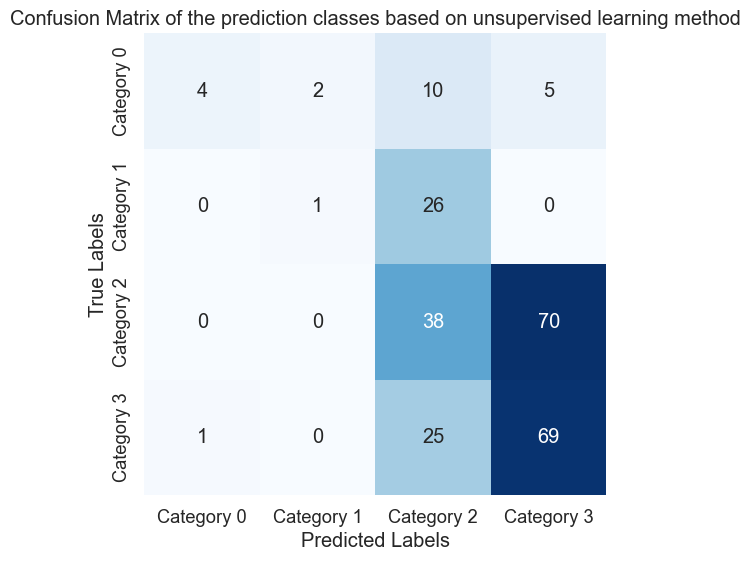

In [103]:
# Define class labels
class_labels = ['Category 0', 'Category 1', 'Category 2', 'Category 3']

# Create a seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of the prediction classes based on unsupervised learning method')

# Display the plot
plt.show()

In [43]:
# Calculate precision, recall, F1-score, and support
report = classification_report(true_labels, predicted_labels,target_names=class_labels)

# Print the metrics
print(report)

              precision    recall  f1-score   support

   Unique ID       0.79      0.14      0.24        77
   Timestamp       0.42      0.05      0.09        94
    Activity       0.34      0.32      0.33       321
       Other       0.48      0.75      0.59       298

    accuracy                           0.43       790
   macro avg       0.51      0.32      0.31       790
weighted avg       0.45      0.43      0.39       790



# Supervised ML model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
# Create and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)  # You can adjust hyperparameters as needed
clf.fit(X_train.drop(['table_name','col_name'], axis=1), y_train)

# Predict on the test set
y_pred = clf.predict(X_test.drop(['table_name'	,'col_name'],axis=1))
# y_pred = clf.predict(X_val.drop(['Cluster'	,'table_name'	,'col_name'],axis=1))
# Calculate the classification score (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy}")

# Generate the confusion matrix
confusion_random_forest = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(confusion)

Classification Accuracy: 0.9886075949367089


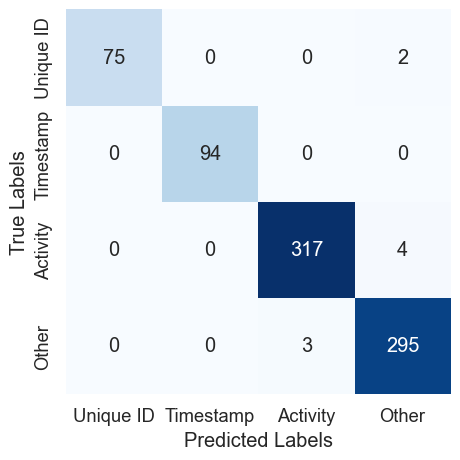

In [30]:
class_labels = ['Unique ID', 'Timestamp', 'Activity', 'Other']

# Create a seaborn heatmap for the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion_random_forest, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.title('Confusion Matrix of the prediction classes based random forest classifier')

# Display the plot
plt.show()

In [31]:
class_labels = ['Unique ID', 'Timestamp', 'Activity', 'Other']
# Calculate precision, recall, F1-score, and support
report = classification_report(y_test, y_pred,target_names=class_labels)

# Print the metrics
print(report)

              precision    recall  f1-score   support

   Unique ID       1.00      0.97      0.99        77
   Timestamp       1.00      1.00      1.00        94
    Activity       0.99      0.99      0.99       321
       Other       0.98      0.99      0.98       298

    accuracy                           0.99       790
   macro avg       0.99      0.99      0.99       790
weighted avg       0.99      0.99      0.99       790



In [92]:
# Create and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can adjust the kernel and other hyperparameters
svm_classifier.fit(X_train.drop(['table_name','col_name'], axis=1), y_train)

# Predict on the test set
# y_pred_svm = svm_classifier.predict(X_val.drop(['Cluster'	,'table_name'	,'col_name'],axis=1))
y_pred_svm = svm_classifier.predict(X_test.drop(['table_name'	,'col_name'],axis=1))
# Calculate the classification score (accuracy)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classification Accuracy: {accuracy_svm}")

# Generate the confusion matrix
confusion_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(confusion_svm)

SVM Classification Accuracy: 0.6962025316455697
SVM Confusion Matrix:
[[ 44   0  17  16]
 [  5  82   7   0]
 [  2   7 243  69]
 [  2   1 114 181]]


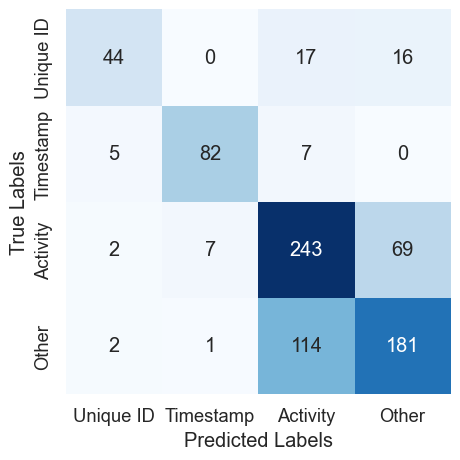

In [100]:
class_labels = ['Unique ID', 'Timestamp', 'Activity', 'Other']

# Create a seaborn heatmap for the confusion matrix
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion_svm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.title('Confusion Matrix of the prediction classes based SVM classifier')

# Display the plot
plt.show()

In [101]:
class_labels = ['Unique ID', 'Timestamp', 'Activity', 'Other']
# Calculate precision, recall, F1-score, and support
report = classification_report(y_test, y_pred_svm,target_names=class_labels)

# Print the metrics
print(report)

              precision    recall  f1-score   support

   Unique ID       0.83      0.57      0.68        77
   Timestamp       0.91      0.87      0.89        94
    Activity       0.64      0.76      0.69       321
       Other       0.68      0.61      0.64       298

    accuracy                           0.70       790
   macro avg       0.76      0.70      0.73       790
weighted avg       0.71      0.70      0.70       790



In [27]:
import joblib

In [28]:
# Save the GMM model to a file
joblib.dump(gmm, 'gmm_model.pkl')

# Load the saved GMM model from a file
# loaded_gmm = joblib.load('gmm_model.pkl')

['gmm_model.pkl']

# PCA

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
# Step 1: Standardize your data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data)

In [13]:
# Step 2: Perform PCA
n_components = 8  # Number of features
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

PCA(n_components=8)

In [14]:
# Step 3: Retrieve explained variances
explained_variances = pca.explained_variance_ratio_

# Step 4: Sort features by importance in descending order
feature_importance = list(enumerate(explained_variances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

In [15]:
# Now, 'feature_importance' contains the indices and importance values of features
# in descending order of importance. You can print or use this information as needed.
for idx, importance in feature_importance:
    print(f"Feature {idx}: Importance = {importance:.4f}")

Feature 0: Importance = 0.3041
Feature 1: Importance = 0.2567
Feature 2: Importance = 0.1574
Feature 3: Importance = 0.1177
Feature 4: Importance = 0.1055
Feature 5: Importance = 0.0585
Feature 6: Importance = 0.0000
Feature 7: Importance = 0.0000


# Cluster plot

In [ ]:
# Load the saved GMM model
with open('gmm_model.pkl', 'rb') as file:
    gmm_model = pickle.load(file)

# Assuming you have your data in a variable called 'data'
# Make sure your data has the same number of features (8) as your trained GMM
# You can use the 'predict' method to assign data points to clusters
cluster_assignments = gmm_model.predict(train_data)

# Now, you can create a scatter plot with different colors for each cluster
# You can choose any two features to visualize; for example, features 0 and 1
feature_x = 0  # Replace with the index of the feature you want on the x-axis
feature_y = 1  # Replace with the index of the feature you want on the y-axis

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:, feature_x], train_data[:, feature_y], c=cluster_assignments, cmap='viridis')
plt.title('GMM Clusters')
plt.xlabel(f'Feature {feature_x}')
plt.ylabel(f'Feature {feature_y}')
plt.colorbar()
plt.show()

In [19]:
from joblib import load


In [21]:
load('gmm_model.pkl')

GaussianMixture(n_components=4)

In [22]:
loaded_gmm = load('gmm_model.pkl')
cluster_assignments = loaded_gmm.predict(train_data)

In [24]:
cluster_assignments

array([3, 3, 3, ..., 0, 0, 3], dtype=int64)

In [35]:
np.unique(cluster_assignments , return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([5121,  145,   91, 2951], dtype=int64))

In [29]:
train_data

,Completeness,Precision,Integrity,Objectivity,Conciseness,Uniqueness,Informativeness,EncodedDatatype
0,0.005887,0.99198,0.994113,0.094149,0.166667,0.237378,0.437666,3
1,0.002309,0.99000,0.997691,0.086561,0.000000,0.203235,0.434629,3
2,0.001734,0.99000,0.998266,0.100380,0.000000,0.202429,0.440154,3
3,0.002312,0.99000,0.997688,0.102161,0.000000,0.203239,0.440869,3
4,0.002312,0.99000,0.997688,0.090962,0.000000,0.203239,0.436389,3
...,...,...,...,...,...,...,...,...
8303,0.001000,0.66000,0.999000,0.001000,0.000000,0.201400,10.200401,2
8304,0.002500,0.66099,0.997500,0.015732,0.000000,0.201400,10.206294,2
8305,0.002000,0.66066,0.998000,0.019811,0.000000,0.201400,10.207925,2
8306,0.001500,0.66033,0.998500,0.011407,0.000000,0.201400,10.204564,2


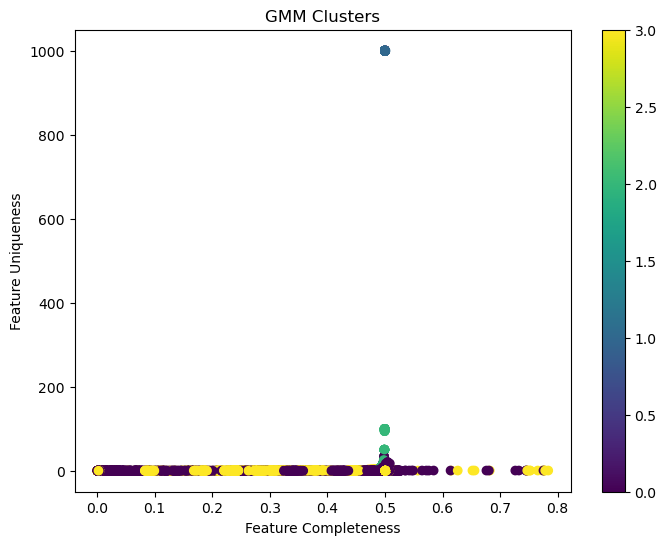

In [39]:
# Now, you can create a scatter plot with different colors for each cluster
# You can choose any two features to visualize; for example, features 0 and 1
feature_x = 'Completeness'	  # Replace with the index of the feature you want on the x-axis
feature_y = 'Uniqueness' # Replace with the index of the feature you want on the y-axis

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_data[feature_x], train_data[feature_y], c=cluster_assignments)
plt.title('GMM Clusters')
plt.xlabel(f'Feature {feature_x}')
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel(f'Feature {feature_y}')
plt.colorbar()
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

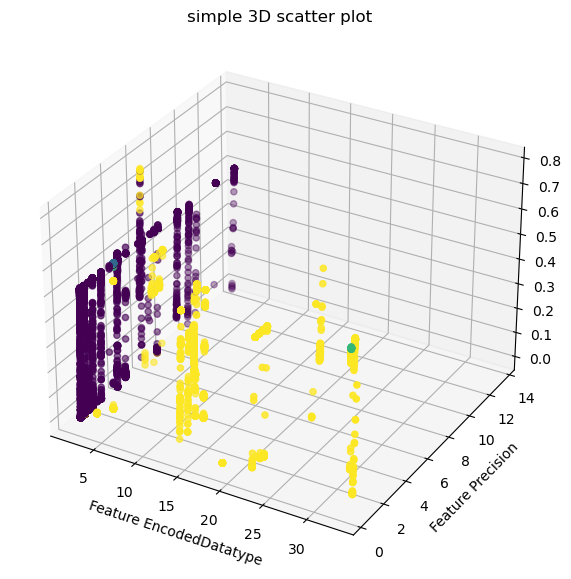

In [51]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
feature_z = 'Completeness'	  # Replace with the index of the feature you want on the x-axis
feature_y = 'Precision'
feature_x = 'EncodedDatatype'
# Creating plot
ax.scatter3D(train_data[feature_x], train_data[feature_y], train_data[feature_z],c=cluster_assignments, cmap='viridis')
plt.title("simple 3D scatter plot")
plt.xlabel(f'Feature {feature_x}')
plt.ylabel(f'Feature {feature_y}')
plt.colorbar()
# plt.zlabel(f'Feature {feature_z}')
# show plot
plt.show()